# Implementing a Neural Network from Scratch in Python


### This notebook will implement a simple 3-layer neural network from scratch


Basic knowledge of Calculus, Machine Learning concepts and optimization techniques will be helpful to gain a full understanding of how neural networks work.

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')
%matplotlib inline

## Generating a dataset

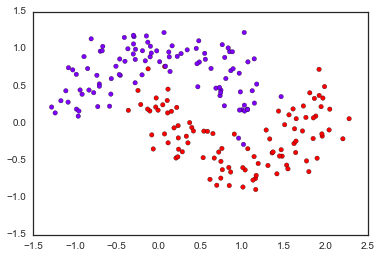

In [60]:
from sklearn import datasets
np.random.seed(3)
X, y = datasets.make_moons(n_samples=200, noise=0.2)
plt.scatter(X[:,0],X[:,1], s=20, c = y, cmap=plt.cm.rainbow);

The goal is to train a model using Machine Learning techniques that is able to separate accurately the two classes (purple and red).

## Logistic Regression

Let's see what a simple logictic regression can do for us.

In [61]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()
logit.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [90]:
# Helper function to plot a decision boundary.

def plot_decision_boundary(pred_func):
    # Set min and max values
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

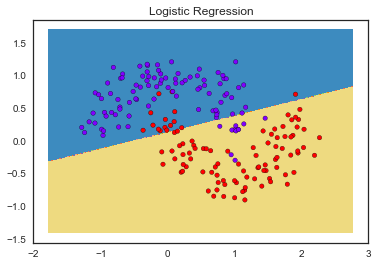

In [92]:
plot_decision_boundary(lambda x: logit.predict(x))
plt.title("Logistic Regression");

In [96]:
print "Accuracy: ",logit.score(X,y)

Accuracy:  0.87


With an accuracy of 87%, the logistic regression model was able to some extent differentiate the classes. However, from the plot we can observe that it was not able to capture the true wavy pattern in the data. In fact, unless we engineer specific non-linear features, a logistic regression model can only produce a linear decision boundary. 

What we need is a model that is able to engineer its own non-linear features.

## Training a Neural Network

** Model Architecture**

Let’s now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also.

![](image/neural_net.jpeg)

**Hidden Layer**

What we can choose is the number  of nodes we want to have in the hidden layer. The higher the size of this layer, the more complex functions the model will be able to aproximate. This is exactly what we will need to obtain the non-linear decicsion boundary for the data.

However higher dimensionality also has its drawbacks:
* higher computation for training
* risk of overfitting data

Because of this tradeoff it is not always obvious what the size of the hidden layer should be. In this notebook we will expermiment with different number of nodes in the hidden later and see how it affects our decicsion boundary.

** Activation Function**

The hidden nodes use an activation function to apply a transformation to the data. These functions are non-linear and make it possible to represent the data in terms of non-linear  features. In this notebook, we will use the tanh function as the activation function. Other popular functions are the sigmoid function or ReLUs. 

The activation function of the output layer is the softmax function. This function takes a score and transforms it into a probability. It is a generalization of the logistic regression for multiple classes